In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os
import json
import torch
import graph_utils as gu
import utils
# import cv
from matplotlib import cm
import math

def filter_data(data, win_len = 100):
    '''
        Data: [1,n]
    '''
    filtered_data = []
    for i in range(np.shape(data)[0]):
        index = max(0,i-win_len)
        filtered_data.append(np.mean(data[index:i+1]))
    return np.array(filtered_data)

def tough_mean(a, b, c):
    # print(np.shape(a))
    length_1 = np.shape(a)[0]
    length_2 = np.shape(b)[0]
    length_3 = np.shape(c)[0]
    max_len = max(length_1,length_2, length_3)

    for i in range(length_1, max_len):
        a = np.append(a,a[-1])

    for i in range(length_2, max_len):
        b = np.append(b,b[-1])

    for i in range(length_3, max_len):
        c = np.append(c,c[-1])

    total = np.array([a, b ,c])
    return np.mean(total, axis = 0), np.std(total,axis = 0)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12} 
linewidth = 2

In [2]:
ROOT = './save_data/'
SEED_INDEX = [2]
NAME = 'train'

No handles with labels found to put in legend.
No handles with labels found to put in legend.


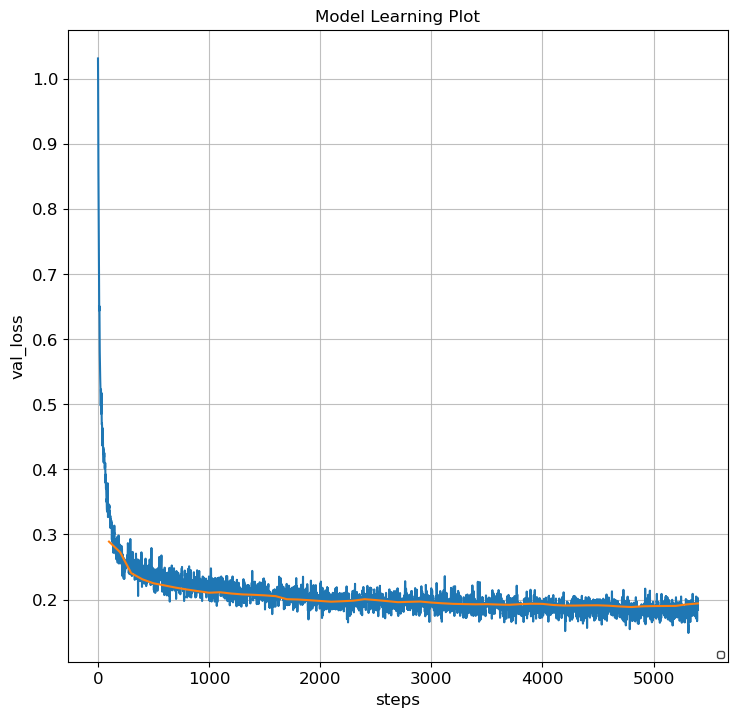

In [41]:
#print model learning result
# layer_num = ['2', '3']
# hidden_num = ['64', '128', '256', '512']
# plt.rcParams['figure.figsize'] = (10, 25)
# for i in range(8):
layer = "3"
hidden = "512"

# if layer =='0':
#     SEED_INDEX = [1]  
# else:
#     SEED_INDEX = [4]
NAME = 'train_'+layer+'_'+hidden
# plt.subplot(8, 2, i+1)
gu.print_result(
    root = ROOT,
    name = NAME,
    title = 'Model Learning Plot',
    seed_index = SEED_INDEX,
    label=None,
    key_name='steps',
    value_name='model_loss',
    max_time=None,
    best_k=None,
    timescale=1,
    ignore_seeds=0)
gu.print_result(
    root = ROOT,
    name = NAME,
    title = 'Model Learning Plot',
    seed_index = SEED_INDEX,
    label=None,
    key_name='steps',
    value_name='val_loss',
    max_time=None,
    best_k=None,
    timescale=1,
    ignore_seeds=0)
plt.show()

(10000, 2)


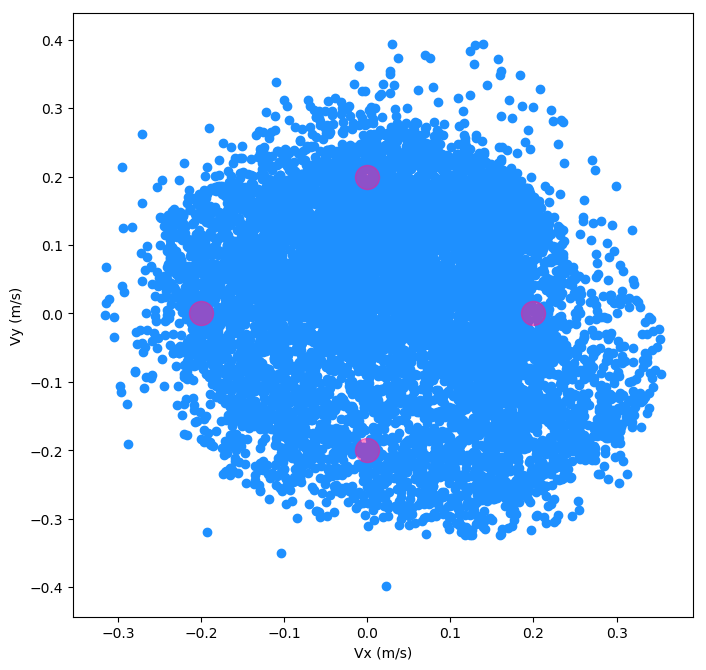

In [42]:
# histogram of velocity
obs = np.load('./save_data/trial_2/buffer_data/obses.npy')
next_obs = np.load('./save_data/trial_2/buffer_data/next_obses.npy')
target_vel = [[0,0.2],[0,-0.2],[0.2,0],[-0.2,0]]
plt.rcParams['figure.figsize'] = (8, 8)
fig = plt.figure()
plt.xlabel('Vx (m/s)')
plt.ylabel('Vy (m/s)')
print(np.shape(obs))
xedges = np.arange(-0.5, 0.5, 0.1)
yedges = np.arange(-0.5, 0.5, 0.1)
vx = []
vy = []
for i in range(np.shape(obs)[0]):
    vx.append(obs[i][0]+ next_obs[i][3])
    vy.append(obs[i][1]+ next_obs[i][4])
x = np.array(vx)
y = np.array(vy)
plt.scatter(x, y,color = 'dodgerblue')
for vel in target_vel:
    plt.scatter(vel[0], vel[1], s=300,color = 'deeppink', alpha = 0.5)

plt.show()

(10000, 2)


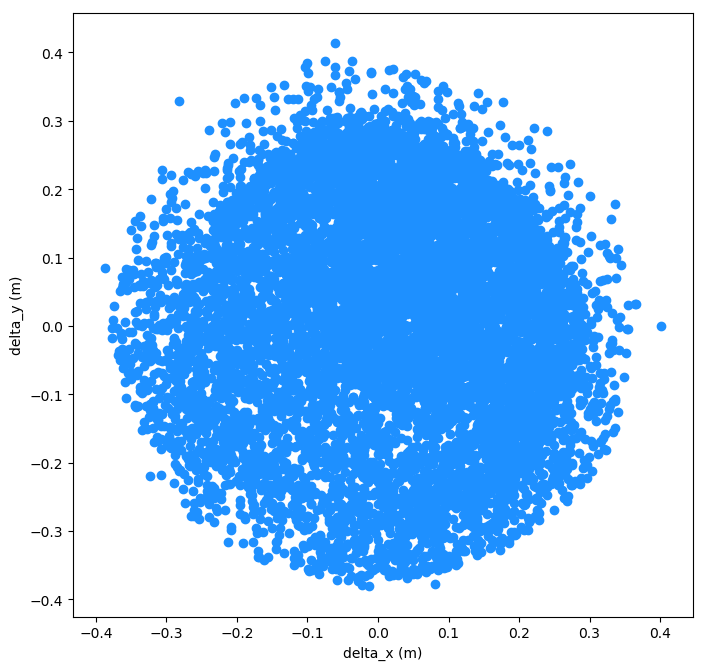

In [43]:
# histogram of velocity
obs = np.load('./save_data/trial_2/buffer_data/obses.npy')
next_obs = np.load('./save_data/trial_2/buffer_data/next_obses.npy')
target_vel = [[0,0.2],[0,-0.2],[0.2,0],[-0.2,0]]
plt.rcParams['figure.figsize'] = (8, 8)
fig = plt.figure()
plt.xlabel('delta_x (m)')
plt.ylabel('delta_y (m)')
print(np.shape(obs))
xedges = np.arange(-0.5, 0.5, 0.1)
yedges = np.arange(-0.5, 0.5, 0.1)
vx = []
vy = []
for i in range(np.shape(obs)[0]):
    vx.append(next_obs[i][1])
    vy.append(next_obs[i][2])
x = np.array(vx)
y = np.array(vy)
plt.scatter(x, y,color = 'dodgerblue')


plt.show()

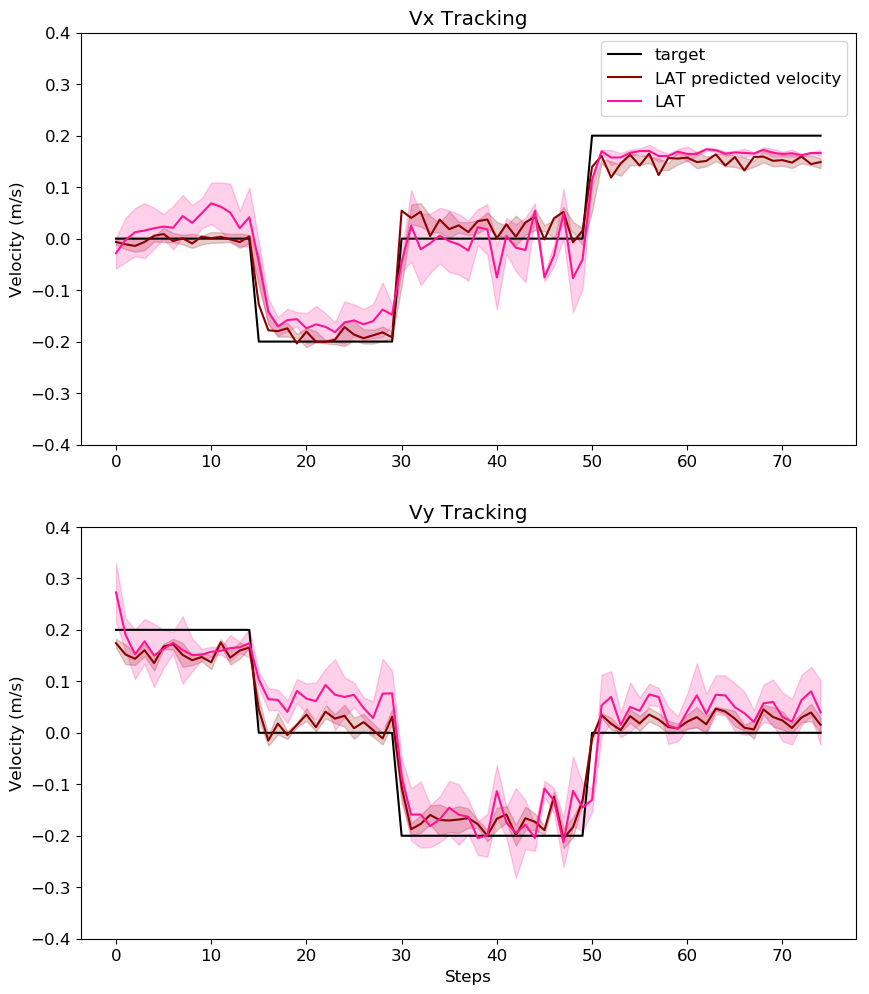

In [45]:
# Plot Evaluation Velocity Tracking
plt.rc('font', **font)
latent_velocity_tracking = np.swapaxes( np.load('./save_data/trial_2/random_velocity_tracking_fin.npy'),0,1)
velocity_tracking = np.swapaxes(np.load('./save_data/trial_1/random_velocity_tracking_fin.npy'),0,1)
# raibert_tracking = np.swapaxes(np.load('./save_data/trial_1/raibert_velocity_tracking_fin.npy'),0,1)
# print(np.shape(latent_velocity_tracking))
# print(latent_velocity_tracking)

# stat = np.empty((3,5,75))
# for i in range(5):
#     for j in range(75):
#         stat[0][i][j] = np.linalg.norm(np.array([latent_velocity_tracking[4][i][j] - latent_velocity_tracking[0][i][j] , latent_velocity_tracking[5][i][j] - latent_velocity_tracking[1][i][j] ]))
#         stat[1][i][j] = np.linalg.norm(np.array([velocity_tracking[4][i][j] - velocity_tracking[0][i][j] , velocity_tracking[5][i][j] - velocity_tracking[1][i][j] ]))
#         stat[2][i][j] = np.linalg.norm(np.array([raibert_tracking[4][i][j] - raibert_tracking[0][i][j] , raibert_tracking[5][i][j] - raibert_tracking[1][i][j] ]))

# for i in range(3):
#     print(i,np.mean(stat[i]), np.std(stat[i]))


linewidth = 1.5
axis = range(np.shape(velocity_tracking)[2])
latent_mean = np.mean(latent_velocity_tracking, axis = 1)
latent_std = np.std(latent_velocity_tracking, axis = 1)
mean = np.mean(velocity_tracking, axis = 1)
std = np.std(velocity_tracking, axis = 1)
# raibert_mean = np.mean(raibert_tracking, axis = 1)
# raibert_std = np.std(raibert_tracking, axis = 1)
# print(np.shape(latent_mean))

# stat = np.empty((3,1,75))
# for i in range(1):
#     for j in range(75):
#         stat[0][i][j] = np.linalg.norm(np.array([latent_mean[4][j] - latent_velocity_tracking[0][i][j] , latent_mean[5][j] - latent_velocity_tracking[1][i][j] ]))
#         stat[1][i][j] = np.linalg.norm(np.array([mean[4][j] - velocity_tracking[0][i][j] , mean[5][j] - velocity_tracking[1][i][j] ]))
#         stat[2][i][j] = np.linalg.norm(np.array([raibert_mean[4][j] - raibert_tracking[0][i][j] , raibert_mean[5][j] - raibert_tracking[1][i][j] ]))
# for i in range(3):
#     print(i,np.mean(stat[i]), np.std(stat[i]))
plt.rcParams['figure.figsize'] = (10, 12)
plt.subplot(2, 1, 1)
# plt.xlabel('Steps')
plt.ylabel('Velocity (m/s)')
plt.ylim( -0.4, 0.4)
plt.plot(axis, mean[0], color='black', label = 'target', linewidth = linewidth)

# plt.plot(axis, mean[2], color='grey', label = 'FOOT predicted velocity')
# plt.fill_between(axis, mean[2] - std[2]/2, mean[2] + std[2]/2, alpha=0.2, color='grey')
# plt.plot(axis, filter_data(mean[4],1), color='dodgerblue', label = 'FOOT', linewidth = linewidth)
# plt.fill_between(axis, filter_data(mean[4],1) - std[4]/2,filter_data(mean[4],2) + std[4]/2, alpha=0.2, color='dodgerblue')

# plt.plot(axis, raibert_mean[4], color='green', label = 'EXP', linewidth = linewidth)
# plt.fill_between(axis, raibert_mean[4] - raibert_std[4]/2, raibert_mean[4] + raibert_std[4]/2, alpha=0.2, color='green')

plt.plot(axis, latent_mean[2], color='darkred', label = 'LAT predicted velocity')
plt.fill_between(axis, filter_data(latent_mean[2],1) - latent_std[2]/2, filter_data(latent_mean[2],1) + latent_std[2]/2, alpha=0.2, color='darkred')
plt.plot(axis, filter_data(latent_mean[4],1), color='deeppink', label = 'LAT', linewidth = linewidth)
plt.fill_between(axis, filter_data(latent_mean[4],1) - latent_std[4]/2, filter_data(latent_mean[4],1) + latent_std[4]/2, alpha=0.2, color='deeppink')

plt.legend()
plt.title('Vx Tracking')

plt.subplot(2, 1, 2)
plt.ylim( -0.4, 0.4)
plt.xlabel('Steps')
plt.ylabel('Velocity (m/s)')
plt.plot(axis, mean[1],  color='black', label = 'target', linewidth = linewidth)

# plt.plot(axis, mean[3], color='grey', label = 'FOOT predicted velocity')
# plt.fill_between(axis, mean[3] - std[3]/2, mean[3] + std[3]/2, alpha=0.2, color='grey')
# plt.plot(axis, mean[5], color='dodgerblue', label = 'FOOT', linewidth = linewidth)
# plt.fill_between(axis, mean[5] - std[5]/2, mean[5] + std[5]/2, alpha=0.2, color='dodgerblue')

# plt.plot(axis, raibert_mean[5], color='green', label = 'EXP', linewidth = linewidth)
# plt.fill_between(axis, raibert_mean[5] - raibert_std[5]/2, raibert_mean[5] + raibert_std[5]/2, alpha=0.2, color='green')

plt.plot(axis, latent_mean[3], color='darkred', label = 'LAT predicted velocity')
plt.fill_between(axis, latent_mean[3] - latent_std[3]/2, latent_mean[3] + latent_std[3]/2, alpha=0.2, color='darkred')
plt.plot(axis, filter_data(latent_mean[5],1), color='deeppink', label = 'LAT', linewidth = linewidth)
plt.fill_between(axis, filter_data(latent_mean[5],1) - latent_std[5]/2, filter_data(latent_mean[5],1) + latent_std[5]/2, alpha=0.2, color='deeppink')

plt.title('Vy Tracking')

plt.show()

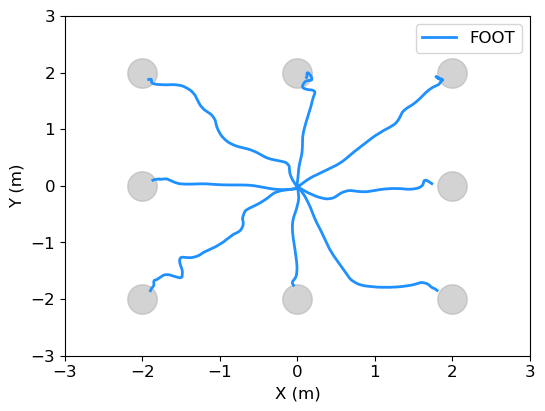

In [48]:
target_position_test = [np.array([0.0, 2.0, 0.0]),
                            np.array([2.0, 2.0, 0.0]),
                            np.array([-2.0, 2.0, 0.0]),
                            np.array([2.0, 0.0, 0.0]),
                            np.array([-2.0, 0.0, 0.0]),
                            np.array([0.0, -2.0, 0.0]),
                            np.array([-2.0, -2.0, 0.0]),
                            np.array([2.0, -2.0, 0.0]),]
plt.rc('font', **font)
linewidth = 2
FOOT_total = []
latent_data_total = []


position_tracking_0 = np.load('./save_data/trial_2/random_multi_tgt_test_' + str(0) +'.npy')
position_tracking_1 = np.load('./save_data/trial_2/random_multi_tgt_test_' + str(1) +'.npy')
position_tracking_2 = np.load('./save_data/trial_2/random_multi_tgt_test_' + str(2) +'.npy')

for i in range(8):    
    for j in range(2):
        ft_position_tracking, ft_std = tough_mean(position_tracking_0[i*2 + j] - position_tracking_0[i*2 + j][0], position_tracking_1[i*2 + j] - position_tracking_1[i*2 + j][0],       position_tracking_2[i*2 + j] - position_tracking_2[i*2 + j][0])
        FOOT_total.append(filter_data(ft_position_tracking))

plt.rcParams['figure.figsize'] = (6, 4.5)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.ylim( -3, 3)
plt.xlim( -3, 3)
# plt.title('Hardware Goals Reaching')
plt.scatter(target_position_test[0][0], target_position_test[0][1], s=450,color = 'darkgrey', alpha = 0.5)
plt.plot(FOOT_total[0], FOOT_total[1],color='dodgerblue',label = 'FOOT' , linewidth = linewidth)

for index in range(1,8):
    plt.scatter(target_position_test[index][0], target_position_test[index][1], s=450,color = 'darkgrey', alpha = 0.5)
    plt.plot(FOOT_total[2*index], FOOT_total[2*index+1],color='dodgerblue', linewidth= linewidth)

plt.legend()
plt.show()

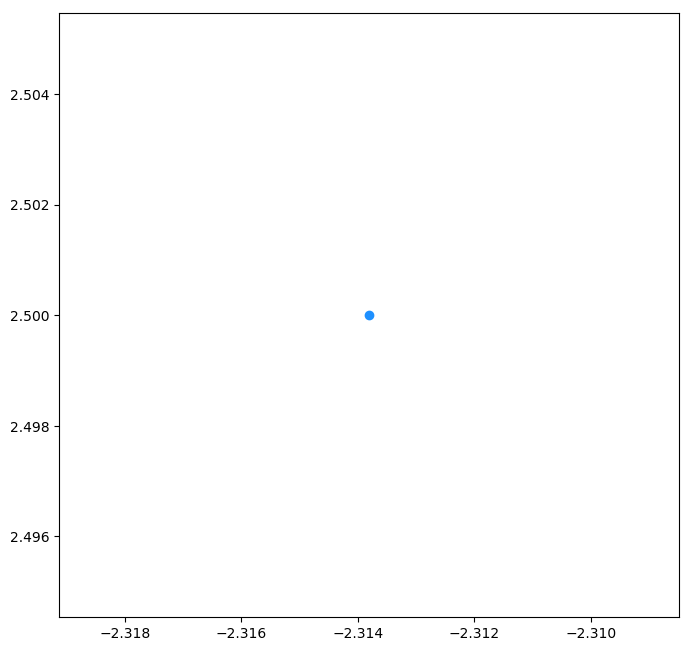

In [44]:
z_all = np.load('./save_data/trial_2/trash_action.npy')
z_all= z_all.reshape((2,np.shape(z_all)[0]))
plt.rcParams['figure.figsize'] = (8, 8)
fig = plt.figure()
plt.scatter(z_all[0], z_all[1],color = 'dodgerblue')


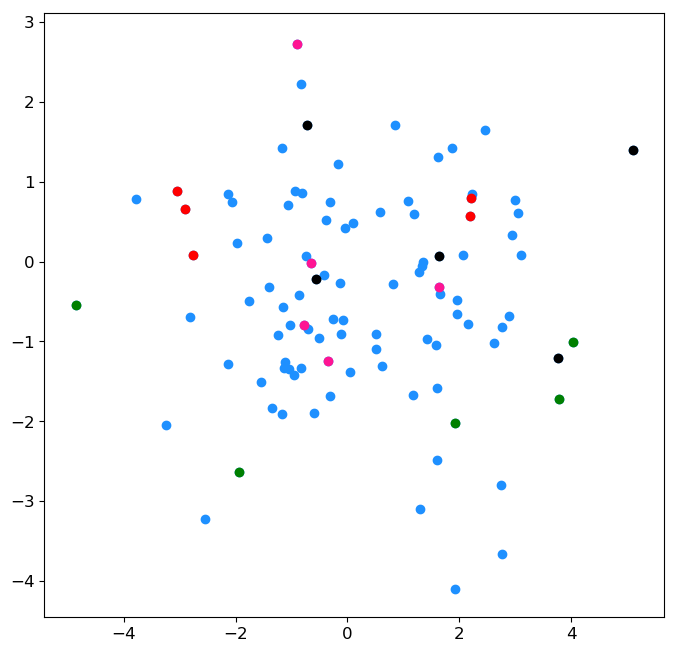

In [53]:
# plotting Z


z_all = np.array([[-0.1323,  0.5842],
        [-2.8065, -0.0856],
        [-1.1756, -0.6470],
        [-0.9050, -0.7823],
        [ 1.6291, -0.3530],
        [ 5.1072,  1.6413],
        [-0.7229,  3.7578],
        [-0.5567,  4.0280],
        [ 1.9187, -4.8594],
        [-1.9431,  3.7817],
        [-2.8968,  2.1985],
        [-2.7562,  2.2173],
        [-3.0368,  2.6182],
        [-3.2377,  2.7556],
        [-3.7839,  2.9918],
        [ 1.9569,  1.0747],
        [ 2.8959,  0.5088],
        [ 1.9528,  1.3273],
        [ 1.9246,  1.2855],
        [ 2.0665,  1.5744],
        [ 1.4152,  3.0941],
        [ 1.1849,  3.0571],
        [ 1.6036,  2.9435],
        [ 1.8776,  2.7641],
        [ 2.1606,  2.7389],
        [-0.3193, -1.3452],
        [-0.4225,  0.8186],
        [ 0.8416,  0.0400],
        [ 1.6206, -0.5991],
        [-1.1492, -1.4297],
        [ 1.3438, -0.9451],
        [-1.3961, -0.5065],
        [-0.8307, -2.1383],
        [ 1.3006, -1.0413],
        [-0.8249, -0.7020],
        [ 2.4630, -1.0325],
        [ 1.6555, -0.7351],
        [-0.0521, -1.5364],
        [ 1.1746, -0.2507],
        [-1.0661, -0.3070],
        [ 1.6095, -1.7593],
        [-0.3843, -1.9689],
        [-0.1720,  0.5108],
        [-0.1118, -1.2336],
        [ 0.6149, -1.1078],
        [-0.8193,  0.0947],
        [-2.1426, -1.1325],
        [-2.0693, -0.8634],
        [-2.5386, -0.9550],
        [ 2.2242, -1.1708],
        [-0.2698,  0.6200],
        [-0.6895, -0.7367],
        [ 1.4169, -0.0183],
        [ 2.7282, -0.7995],
        [-0.3120, -1.2386],
        [ 1.3933,  0.0697],
        [ 1.7125, -1.2119],
        [-0.2171, -1.0105],
        [-2.0218, -0.5407],
        [-2.6332, -1.7153],
        [ 0.6557,  0.5727],
        [ 0.0847,  0.7955],
        [ 0.8848, -1.0181],
        [-2.0435, -3.6653],
        [ 0.7798,  0.7708],
        [-0.6512,  0.7578],
        [-0.6813, -1.0962],
        [-0.4850, -0.0512],
        [-4.1045, -0.1278],
        [ 0.0833, -1.0386],
        [-0.9634,  0.0784],
        [ 0.5917,  0.6102],
        [-2.4860,  0.3284],
        [ 1.4268, -0.8185],
        [-0.7789, -2.8020],
        [-1.6824, -1.8370],
        [-0.1701, -0.2783],
        [ 1.7057, -1.3861],
        [ 1.3044, -1.9015],
        [-0.5663,  0.2938],
        [-0.0110,  0.8789],
        [-0.3178, -0.9528],
        [ 2.2265, -1.2838],
        [-3.1016, -1.3500],
        [-1.3376, -0.8422],
        [ 1.6487, -0.7901],
        [-0.4034,  0.0760],
        [ 0.4258, -1.5082],
        [-1.6719, -0.7244],
        [ 0.7128,  0.7489],
        [-1.5807, -0.4895],
        [ 0.5189,  0.2342],
        [ 1.2272, -0.9091],
        [-0.9030, -0.9165],
        [-1.3068, -1.2530],
        [ 0.8580,  0.4876],
        [ 0.8522, -1.3316],
        [ 0.7478, -0.4229],
        [-3.2281, -1.4149],
        [ 0.8511, -1.9052]])
z_all= z_all.reshape((2,100))
plt.rcParams['figure.figsize'] = (8, 8)
fig = plt.figure()
plt.scatter(z_all[0], z_all[1],color = 'dodgerblue')

plt.scatter(z_all[0][5:10], z_all[1][5:10],color = 'deeppink')
plt.scatter(z_all[0][10:15], z_all[1][10:15],color = 'black')
plt.scatter(z_all[0][15:20], z_all[1][15:20],color = 'green')
plt.scatter(z_all[0][20:25], z_all[1][20:25],color = 'red')